In [2]:
import seaborn as sns
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import time
from sklearn.preprocessing import MinMaxScaler


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
df = pd.read_csv('/content/drive/MyDrive/shohei-ig.csv')


In [34]:
df.shape

(69042, 18)

In [35]:
df.columns

Index(['content_type', 'creation_time', 'hashtags', 'id', 'is_branded_content',
       'lang', 'match_type', 'modified_time', 'multimedia', 'post_owner.type',
       'post_owner.id', 'post_owner.name', 'post_owner.username',
       'statistics.comment_count', 'statistics.like_count', 'statistics.views',
       'statistics.views_date_last_refreshed', 'text'],
      dtype='object')

In [36]:
df.head()

,content_type,creation_time,hashtags,id,is_branded_content,lang,match_type,modified_time,multimedia,post_owner.type,post_owner.id,post_owner.name,post_owner.username,statistics.comment_count,statistics.like_count,statistics.views,statistics.views_date_last_refreshed,text
0,videos,2024-11-05T14:31:03-08:00,"[""\u304f\u308b\u307f\u30d1\u30f3\u30ec\u30b7\u...",1568573043749773,False,ja,"[""post_text""]",2024-11-05T15:46:35-08:00,"[{""id"":""1568573043749773"",""type"":""video"",""url""...",business,423384980520959,タエ🍞〻おうちで作るパンレシピ,t.s.t.m,2.0,NaN,NaN,NaN,｛レシピ｝香ばしふわっ♩くるみパン\n\nレシピは文末にあります🙏\n\n脳みそ🧠がザワザワ...
1,videos,2024-11-05T14:25:52-08:00,"[""dodgers"",""ohtani"",""gambling"",""mybookie"",""spo...",579859241147363,False,en,"[""post_text""]",2024-11-05T14:46:05-08:00,"[{""id"":""579859241147363"",""type"":""video"",""url"":...",creator,1029391485186220,Drinkin’ Bros Sports,drinkinbrossports,3.0,50.0,NaN,NaN,Dicey… \n\n#ohtani #dodgers #gambling \n#sport...
2,videos,2024-11-05T14:24:33-08:00,"[""shoheiohtani"",""\u5927\u8c37\u7fd4\u5e73""]",1116683993212519,False,ja,"[""post_text""]",2024-11-05T15:56:04-08:00,"[{""id"":""1116683993212519"",""type"":""video"",""url""...",personal,349706038046099,nao¹⁷🧚‍♀️,shohime0705,17.0,1369.0,NaN,NaN,😳💙\nみたかったやつだぁ~しみるぜ🥺🫶\n公式様ありがとうございます！もっとください~\n...
3,photos,2024-11-05T14:09:56-08:00,"[""shoheiohtani"",""milb"",""baseballlife"",""ohtani""...",1113349633644985,False,en,"[""post_text""]",2024-11-05T14:10:37-08:00,"[{""id"":""1113349633644985"",""type"":""photo"",""url""...",personal,1155884915432157,David John Pollard,ohtanicanada,6.0,607.0,NaN,NaN,Via baba: Shohei still holds the MLB record fo...
4,videos,2024-11-05T13:03:19-08:00,NaN,2099206697205847,False,en,"[""post_text""]",2024-11-05T15:25:53-08:00,"[{""id"":""2099206697205847"",""type"":""video"",""url""...",business,810320841121605,CARVANA PPA TOUR,ppatour,40.0,623.0,NaN,NaN,SCORCHED ☄️Is hitting a pickleball like this h...


Data exploration should include summaries of distributions of
key variables (i.e. histograms for continuous variables, bar charts for categorical, and time
series for temporal data). Note observations you have about the data.

In [37]:
selected_cols = ['content_type', 'creation_time', 'hashtags', 'id', 'is_branded_content',
       'lang', 'post_owner.type',
       'post_owner.id', 'post_owner.name', 'post_owner.username',
       'statistics.comment_count', 'statistics.like_count', 'statistics.views',
        'text']

df1 = df[selected_cols]

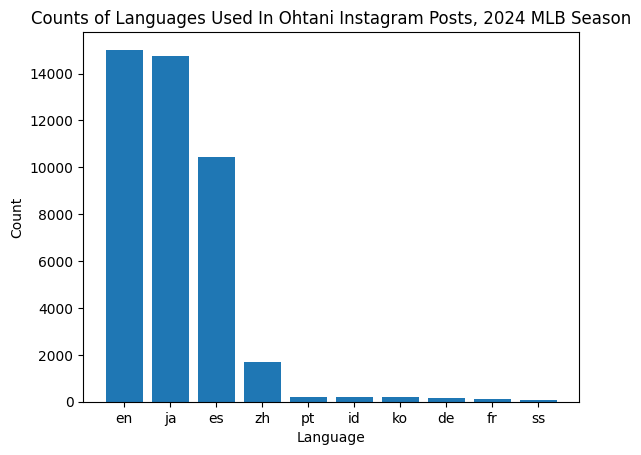

In [44]:
lang_counts = df1['lang'].value_counts()

# Plot the bar chart
plt.bar(lang_counts.index[0:10], lang_counts.values[0:10])
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Counts of Languages Used In Ohtani Instagram Posts, 2024 MLB Season')
# plt.xticks(rotation=45)  # Rotate x labels if needed for readability
plt.show()


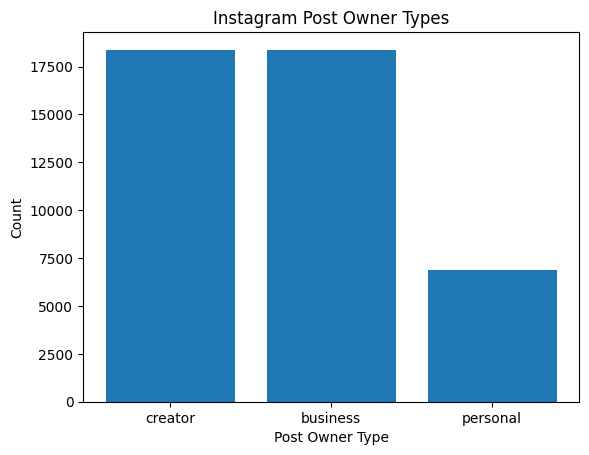

In [45]:
owner_counts = df1['post_owner.type'].value_counts()

# Plot the bar chart
plt.bar(owner_counts.index, owner_counts.values)
plt.xlabel('Post Owner Type')
plt.ylabel('Count')
plt.title('Instagram Post Owner Types')
# plt.xticks(rotation=45)  # Rotate x labels if needed for readability
plt.show()

In [39]:
df1['creation_time'] = pd.to_datetime(df1['creation_time'], utc=True)

<ipython-input-39-21fe0a3e1ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['creation_time'] = pd.to_datetime(df1['creation_time'], utc=True)


<ipython-input-46-e7eab132e7e6>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  time_series_data = df1['creation_time'].dt.to_period('W').value_counts().sort_index()


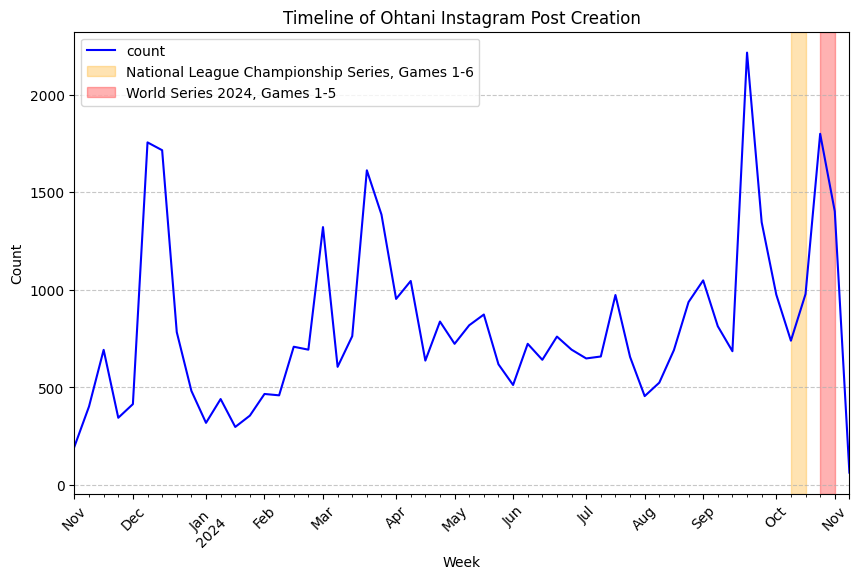

In [46]:
# plt.hist(df1['creation_time'], bins=30)

time_series_data = df1['creation_time'].dt.to_period('W').value_counts().sort_index()

# Plot the time series
plt.figure(figsize=(10, 6))
time_series_data.plot(kind='line', color='blue')

# Shade the area for Oct 25-30
plt.axvspan('2024-10-13', '2024-10-20', color='orange', alpha=0.3, label='National League Championship Series, Games 1-6')

# Shade the area for Oct 25-30
plt.axvspan('2024-10-25', '2024-10-30', color='red', alpha=0.3, label='World Series 2024, Games 1-5')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Count')
plt.title('Timeline of Ohtani Instagram Post Creation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()  # Include legend for the shaded area
plt.show()

In [ ]:
df1['creation_time'].min(), df1['creation_time'].max()

(Timestamp('2022-11-01 03:00:19+0000', tz='UTC'),
 Timestamp('2024-11-05 22:31:03+0000', tz='UTC'))

In [41]:
df1[(df1['creation_time'].dt.month == 9) & (df1['creation_time'].dt.year == 2024) & (df['lang'] == 'en')].text

,text
5843,Protector size confirmed and in stock: Shohei ...
5845,Shohei Ohtani named NL Player of the Week... l...
5846,WYA 🕺🏽🛸💕 #baseball #mlb #mlbb #beisbol #pelota...
5848,𝙅𝙐𝙎𝙏 𝙂𝙍𝘼𝘿𝙀𝘿 💎 In the wake of Shohei Ohtani's h...
5851,Is Shohei on his way to becoming the biggest s...
...,...
11209,Via dodgers; And he did it again number 44. 5...
11212,SHOHEI OHTANI. MOOKIE BETTS. FREDDIE FREEMAN.\...
11213,STAY HOT SHOHEI 🔥🔥🔥
11214,"SHOHEI, MOOKIE, AND FREDDIE GO BACK-TO-BACK-TO..."


In [42]:
# df['creation_time'].min(), df['creation_time'].max()
start_date = pd.Timestamp('2023-11-01', tz='UTC')
end_date = pd.Timestamp('2024-11-05', tz='UTC')


# Filter the DataFrame
df1 = df1[(df1['creation_time'] >= start_date) & (df1['creation_time'] <= end_date)]


In [47]:
df1['log10_likes'] = np.log10(df1['statistics.like_count'] + 1)


In [ ]:
# df1['log10_reactions'] = np.log10(df1['statistics.reaction_count'] + 1)


<ipython-input-29-1c7b078136b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['log10_reactions'] = np.log10(df1['statistics.reaction_count'] + 1)


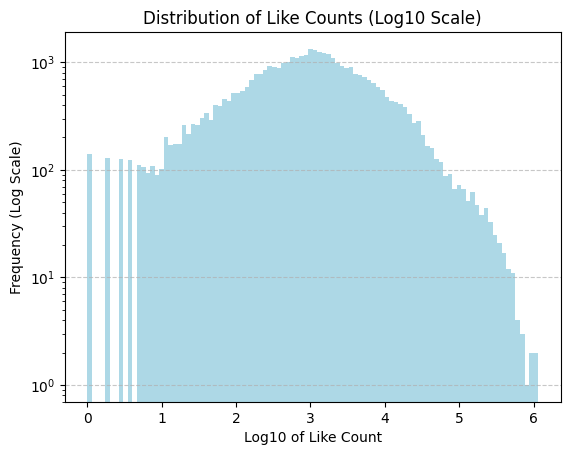

In [49]:
plt.hist(df1['log10_likes'], bins=100, color='lightblue')
plt.xlabel('Log10 of Like Count')
plt.ylabel('Frequency (Log Scale)')
plt.title('Distribution of Like Counts (Log10 Scale)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ticklabel_format(style='plain', axis='x')

plt.yscale("log")

plt.show()

In [ ]:
# plt.hist(df1['log10_reactions'], bins=100, color='green')
# plt.xlabel('Log10 of Reaction Count')
# plt.ylabel('Frequency (Log Scale)')
# plt.title('Distribution of Reaction Counts (Log10 Scale)')
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# plt.ticklabel_format(style='plain', axis='x')

# plt.yscale("log")

# plt.show()

In [ ]:

df1.isna().sum()

,0
content_type,0
creation_time,0
hashtags,10613
id,0
is_branded_content,0
lang,540
post_owner.type,0
post_owner.id,0
post_owner.name,234
post_owner.username,0


In [ ]:
label_encoder = LabelEncoder()

df1['post_owner_label'] = LabelEncoder().fit_transform(df1['post_owner.type'].astype(str))
# 0: business
# 1: creator
# 2: personal

In [ ]:

# df_en['content_type'], content_type_mapping = pd.factorize(df_en['content_type'])
df1['content_type_label'] = label_encoder.fit_transform(df1['content_type'])
# 0: albums
# 1: photos
# 2: stories
# 3: videos

In [ ]:
df1[['content_type','content_type_label']].value_counts()


,,count
content_type,content_type_label,
videos,3,16517
albums,0,13442
photos,1,13211
stories,2,472


In [ ]:
# filtered_df = df1.dropna(subset=['log10_reactions', 'lang'])


In [ ]:
df1.shape

(43642, 17)

In [ ]:
# df_en = df1[df1['lang'] == 'en']
# df_en = df_en[df_en['content_type'].isin(['photos', 'videos'])]


In [ ]:
# df_en = df_en[df_en['statistics.like_count'] > 1000]

In [ ]:
# df_en.dtypes

,0
content_type,object
creation_time,"datetime64[ns, UTC]"
hashtags,object
id,int64
is_branded_content,bool
lang,object
post_owner.type,object
post_owner.id,int64
statistics.comment_count,float64
statistics.like_count,float64


In [ ]:
# Function to tally hashtags
def count_hashtags(hashtags):
    if pd.isna(hashtags):
        return 0  # Return 0 if NaN
    else:
        # Convert the string representation of the list to an actual list and count its length
        return len(eval(hashtags))

# Apply the function to the column and create a new column for counts
df1['hashtag_count'] = df1['hashtags'].apply(count_hashtags)


In [ ]:
# df1['is_branded_content'].value_counts()

,count
is_branded_content,
False,43475
True,167


In [ ]:
df1['is_branded_content'] = df1['is_branded_content'].astype(int)


In [ ]:
# df_en.drop('lang', axis = 1, inplace = True)

In [ ]:
# df_en['post_owner.type'], owner_type_mapping = pd.factorize(df_en['post_owner.type'])
# filtered_df['post_owner.type'] = label_encoder.fit_transform(filtered_df['post_owner.type'])



<ipython-input-50-319adfe31e12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['post_owner.type'] = label_encoder.fit_transform(filtered_df['post_owner.type'])


In [ ]:
columns_to_fill = ['statistics.like_count', 'statistics.views']

df1 = df1.dropna(subset=columns_to_fill)


In [ ]:
df1.shape

(40276, 18)

In [ ]:
df1.isna().sum()

,0
content_type,0
creation_time,0
hashtags,9562
id,0
is_branded_content,0
lang,505
post_owner.type,0
post_owner.id,0
post_owner.name,190
post_owner.username,0


In [ ]:
# Removing \r in text bc one row has it and it's causing issues
df1['text'] = df1['text'].str.replace('\r', '', regex=False)


In [ ]:
# df_test = pd.read_csv('/content/drive/MyDrive/shohei-fb1-cleaned.csv')
# filtered_df.iloc[3260].text, df_test.iloc[3260].text
# filtered_df.shape, df_test.shape
# df_test.isna().sum()
# df_test[df_test.text.isna()]


,content_type,creation_time,id,surface.name,is_branded_content,lang,post_owner.type,post_owner.name,statistics.comment_count,statistics.like_count,statistics.reaction_count,statistics.views,statistics.share_count,text,log10_likes,log10_reactions,post_owner_label


In [ ]:
# filtered_df.shape, df_test.shape


((70338, 17), (70338, 17))

In [ ]:
filtered_df = df1[df1['post_owner.type'].isin(['creator', 'personal'])]


In [ ]:
filtered_df = filtered_df[filtered_df['is_branded_content'] == 0]
filtered_df = filtered_df.drop(columns=['is_branded_content'])


In [ ]:
filtered_df.lang.value_counts()

,count
lang,
ja,9171
en,7661
es,5282
zh,353
pt,124
id,97
de,94
ss,74
om,26


In [ ]:
target_languages = ['en', 'es', 'ja', 'zh', 'ko']

# Update the 'lang' column to group non-target languages under "other"
filtered_df['lang'] = filtered_df['lang'].apply(lambda x: x if x in target_languages else 'other')


In [ ]:
filtered_df['lang'].value_counts()

,count
lang,
ja,9171
en,7661
es,5282
other,757
zh,353
ko,20


In [ ]:
# Assuming 'filtered_df' is your DataFrame
filtered_df['username'] = filtered_df['post_owner.name'] + ' ' + filtered_df['post_owner.username']


In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/shohei-ig-cleaned.csv', index = False)


start joining new data here

In [24]:
df1 = pd.read_csv('/content/drive/MyDrive/shohei-ig-cleaned.csv')


In [25]:
# df_en = df1[df1['lang'] == 'en']
# df_en.shape

In [20]:
dfuser1 = pd.read_csv('/content/drive/MyDrive/final_results_usernamept1.csv')
dfuser2 = pd.read_csv('/content/drive/MyDrive/final_results_usernamept2.csv')
dfuser3 = pd.read_csv('/content/drive/MyDrive/final_results_usernamept3.csv')

In [21]:
dfuser1 = dfuser1.dropna(subset=['name_origin'])
dfuser2 = dfuser2.dropna(subset=['name_origin'])
dfuser3 = dfuser3.dropna(subset=['name_origin'])

In [22]:
df_combined = pd.concat([dfuser1, dfuser2, dfuser3], ignore_index=True)
df_combined.name_origin.value_counts()

,count
name_origin,
5.0,5641
2.0,1278
4.0,407
6.0,101
3.0,53
1.0,44
0.0,40


In [26]:
# Step 1: Join df_combined with df1 on 'id'
df_final = pd.merge(df1, df_combined[['id', 'name_origin']], on='id', how='left')

name_origin_dict = {
    0: 'cham',  # Chinese-American
    1: 'koram',  # Korean-American
    2: 'jpam',  # Japanese-American
    3: 'aam',   # Other Asian-American
    4: 'hl'    # Hispanic/Latino-American
}

# Create binary columns based on the new dictionary
for key, value in name_origin_dict.items():
    df_final[f'is_{value}'] = (df_final['name_origin'] == key).astype(int)


In [32]:

df_final[df_final['is_jpam']==1]['username'].value_counts()

,count
username,
❤︎Sho0705Time❤︎ __sho0705time__,870
Ohtani Central ohtani_central,159
Fukki75🦄 shohei_unicorn,21
Sandra Rider icu_japan,20
Rob Fukuzaki abc7rob,19
...,...
hiro o hirori030303,1
JOURNAL STANDARD MEN'S 表参道 jsomotesando,1
Andrew アンドリュー aarxci,1


In [36]:
ohtanifans = df_final[df_final['username'].str.contains('shohei|ohtani|sho', case=False, na=False)]

In [39]:
ohtanifans['name_origin'].value_counts()

,count
name_origin,
5.0,1155
2.0,1089
3.0,35
4.0,27
6.0,25
0.0,1


In [14]:
dftext1 = pd.read_csv('/content/drive/MyDrive/all_text_results1.csv')
dftext2 = pd.read_csv('/content/drive/MyDrive/all_text_results2.csv')


In [15]:
dftext1 = dftext1.dropna(subset=['en_text'])
dftext2 = dftext2.dropna(subset=['en_text'])


In [17]:
df_combined1 = pd.concat([dftext1, dftext2], ignore_index=True)

In [27]:
df_complete = pd.merge(df_final, df_combined1[['id', 'en_text']], on='id', how='left')


In [29]:
df_complete['en_text'] = df_complete['en_text'].fillna(df_complete['text'])


In [31]:
df_complete.to_csv('/content/drive/MyDrive/shohei-cleaned-gptig.csv', index = False)
